In [73]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
# we have null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

We have null values in 2 columns
* Product_Category_2
* Product_Category_3

So, we can deal with this situation by,
* droping columns, which contain null values
* Or drop these two columns

In [7]:
# So in first approach
df.dropna().shape

(164278, 12)

we loose large part of our data

In [8]:
# So, instead of that, we use second approach.
df = df.drop(['Product_Category_2', 'Product_Category_3'], axis='columns')

In [9]:
# our new data look like
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
# now we cross check if there are any null values present or not
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [11]:
# How many unique customers are there, in this dataset
df['User_ID'].nunique()

5891

In [12]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [13]:
# How many unique products we have
df['Product_ID'].nunique()

3623

In [14]:
# Genders category
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [28]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
# How many occupations are there?
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [17]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [19]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [20]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [22]:
df['Purchase'].sum()

5017668378

In [27]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


# Gender Analysis

In [29]:
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

[Text(0, 0, 'M'), Text(1, 0, 'F')]

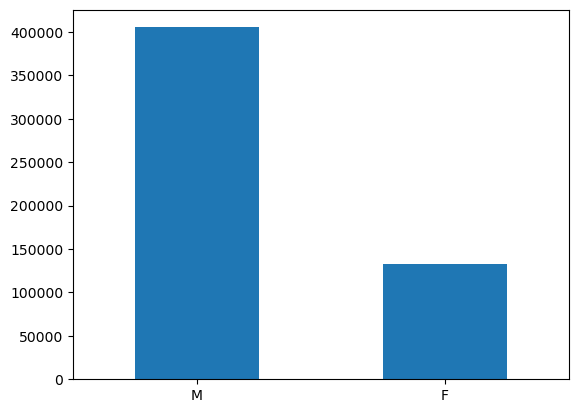

In [39]:
ax = df['Gender'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

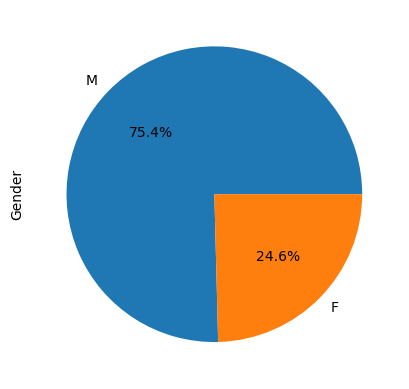

In [41]:
ax = df['Gender'].value_counts().plot(kind='pie', autopct='%.1f%%')

In [42]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\2884760931.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct='%.2f%%')


<Axes: ylabel='Purchase'>

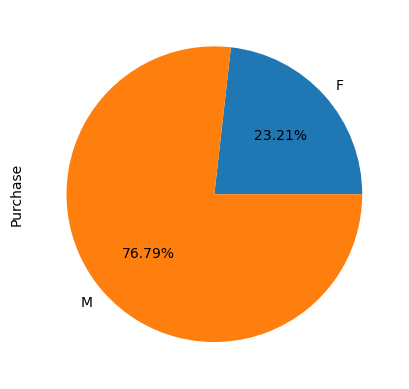

In [46]:
# How much money spend on purchase by gender
df.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct='%.2f%%')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\2190295463.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind='pie', autopct='%.2f%%')


<Axes: ylabel='Purchase'>

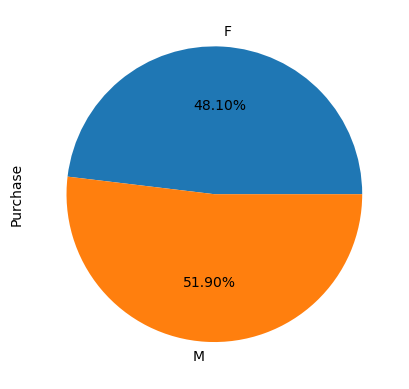

In [48]:
# How they spend money
df.groupby('Gender').mean()['Purchase'].plot(kind='pie', autopct='%.2f%%')

# Analysing Age and Marital status

[Text(0, 0, '0-17'),
 Text(1, 0, '18-25'),
 Text(2, 0, '26-35'),
 Text(3, 0, '36-45'),
 Text(4, 0, '46-50'),
 Text(5, 0, '51-55'),
 Text(6, 0, '55+')]

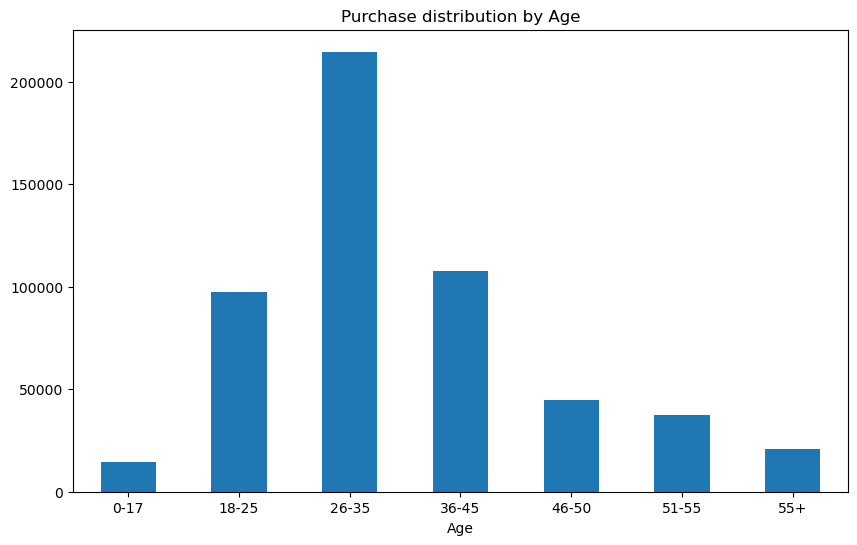

In [52]:
ax = df.groupby('Age').size().plot(kind='bar', figsize=(10, 6), title='Purchase distribution by Age')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

In [56]:
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data = pd.DataFrame(lst, columns=['Age', 'Products'])

In [57]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


[Text(0, 0, '0-17'),
 Text(1, 0, '55+'),
 Text(2, 0, '26-35'),
 Text(3, 0, '46-50'),
 Text(4, 0, '51-55'),
 Text(5, 0, '36-45'),
 Text(6, 0, '18-25')]

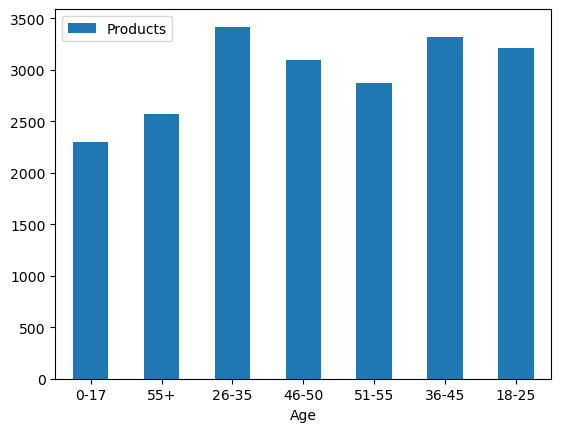

In [62]:
ax = data.plot(kind='bar', x='Age')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\1137639738.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').sum()['Purchase'].plot(kind='bar', x='Age', title="Amount they spend by Age")


<Axes: title={'center': 'Amount they spend by Age'}, xlabel='Age'>

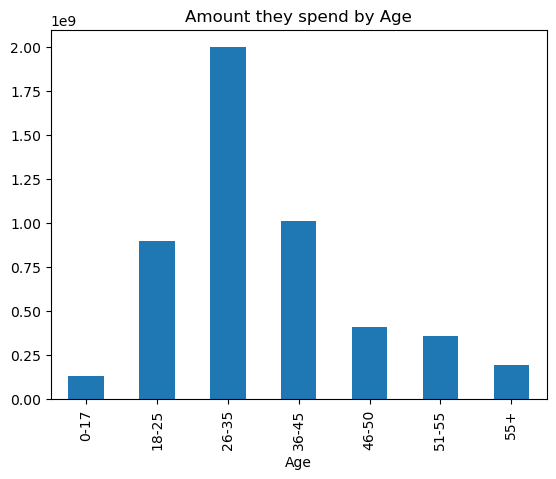

In [66]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar', x='Age', title="Amount they spend by Age")

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\4231596517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind='bar', x='Age')


<Axes: xlabel='Age'>

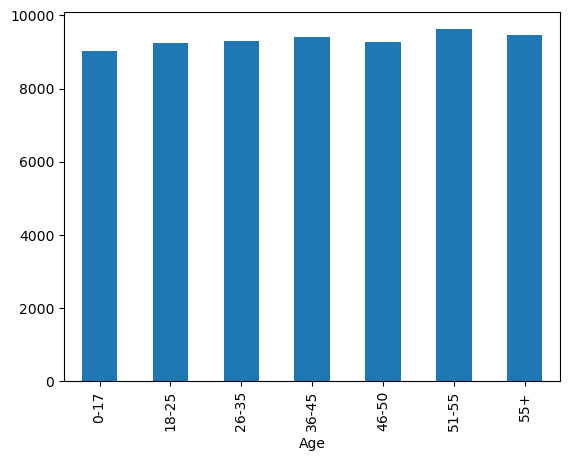

In [67]:
df.groupby('Age').mean()['Purchase'].plot(kind='bar', x='Age')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\1032329004.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind='pie', autopct='%.2f%%')


<Axes: ylabel='Purchase'>

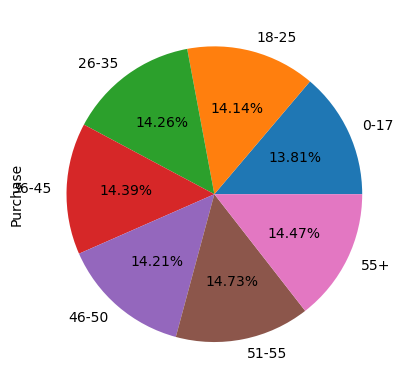

In [68]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie', autopct='%.2f%%')

<Axes: >

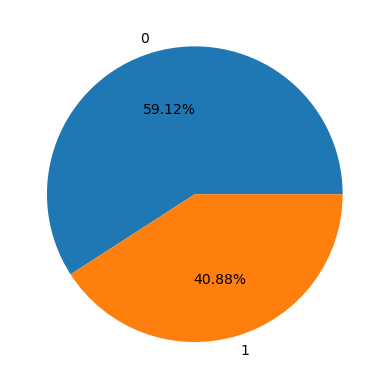

In [70]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct='%.2f%%')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\4290536169.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Marital_Status').mean()['Purchase'].plot(kind='pie', autopct='%.2f%%')


<Axes: ylabel='Purchase'>

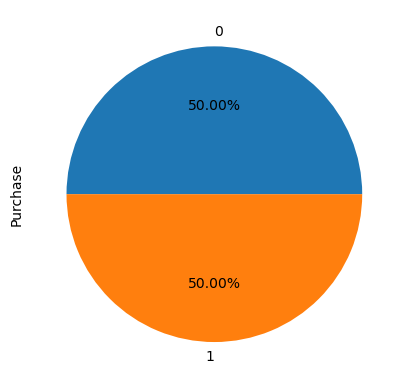

In [72]:
df.groupby('Marital_Status').mean()['Purchase'].plot(kind='pie', autopct='%.2f%%')

# Multicolumn Analysis

<Axes: xlabel='Age', ylabel='count'>

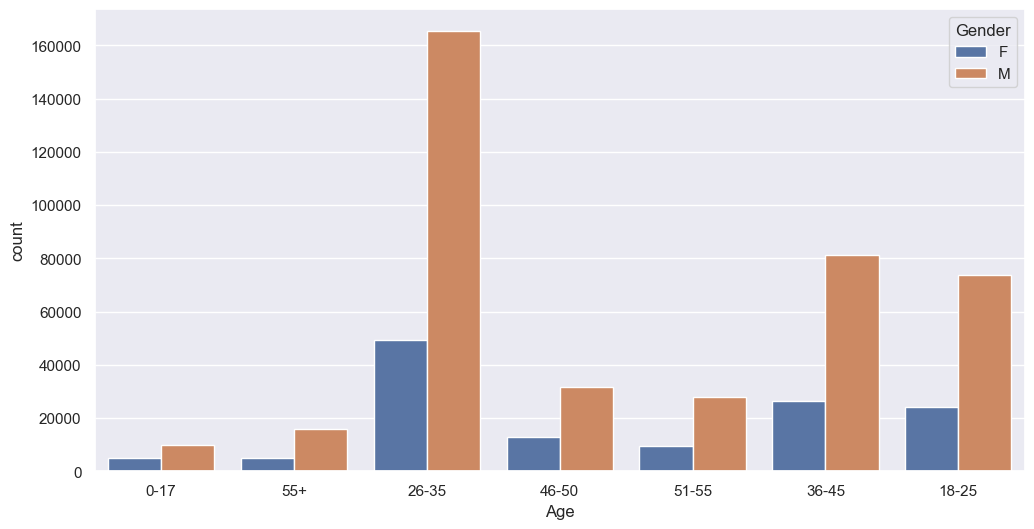

In [75]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Gender', ylabel='count'>

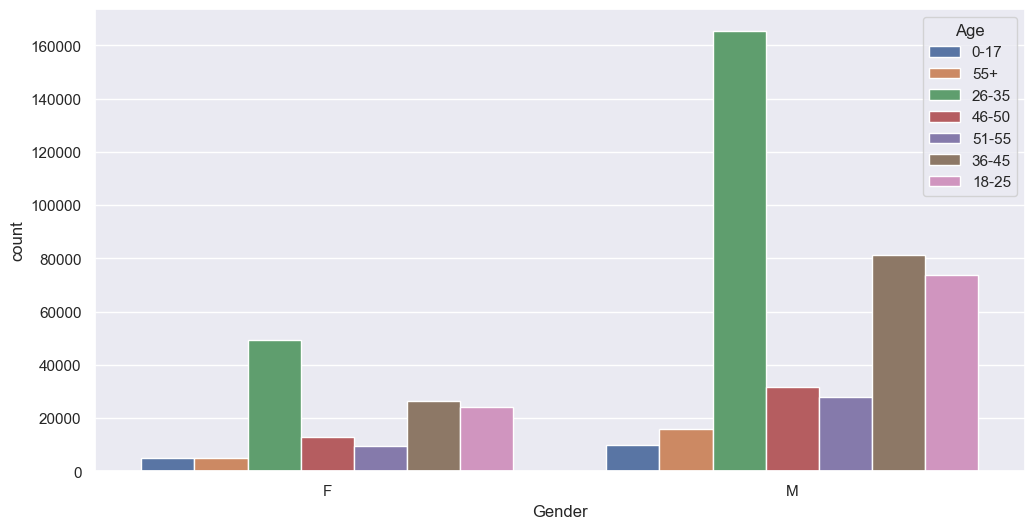

In [76]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.countplot(x='Gender', hue='Age', data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

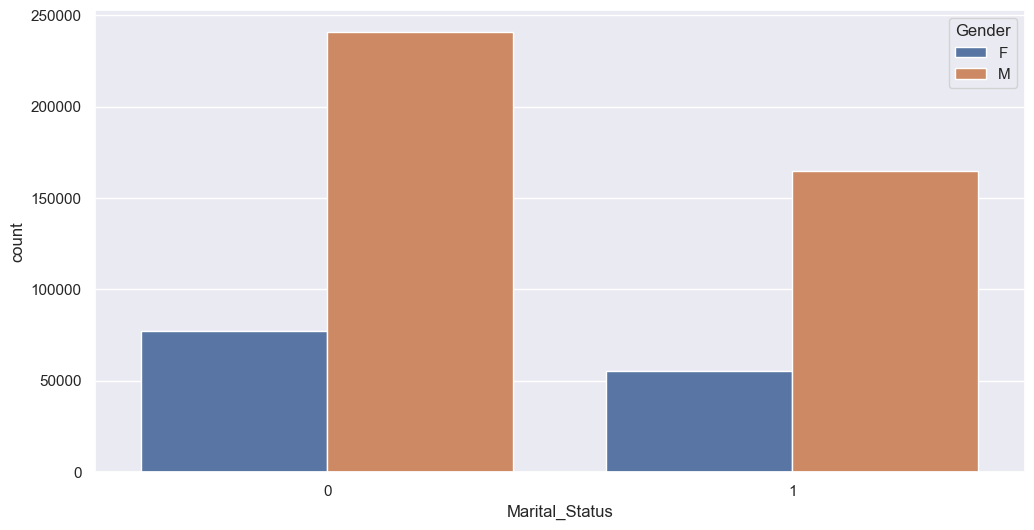

In [77]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.countplot(x='Marital_Status', hue='Gender', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

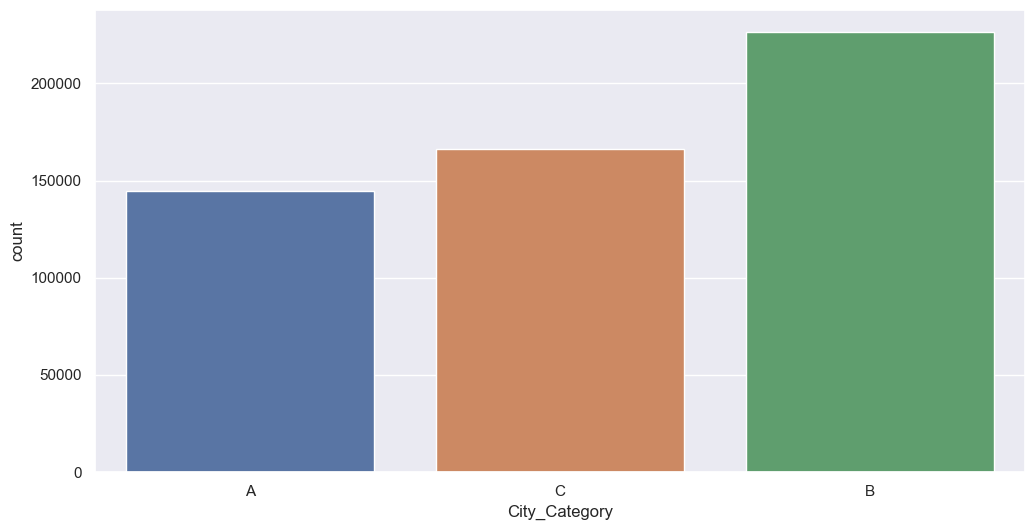

In [78]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

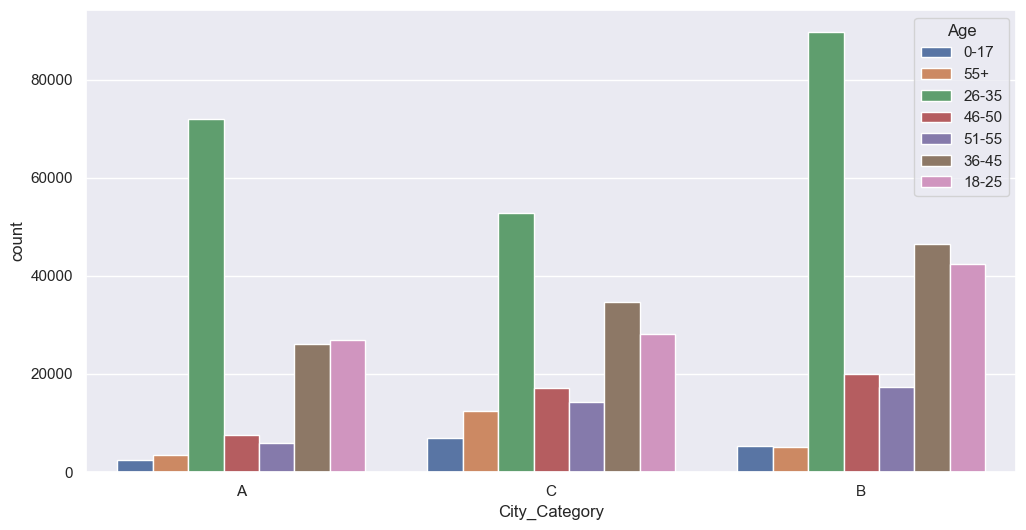

In [84]:
sns.countplot(x='City_Category', hue='Age', data=df)

<Axes: xlabel='Age', ylabel='count'>

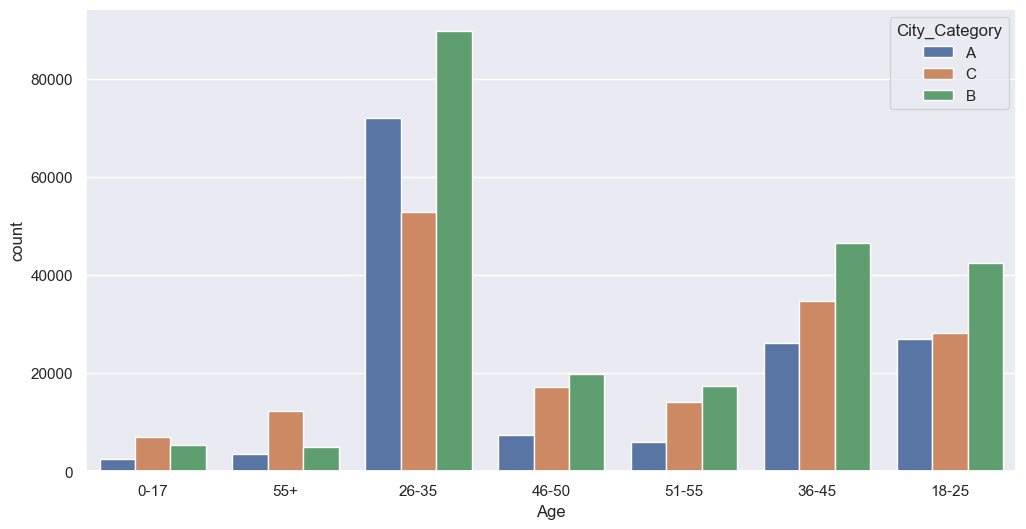

In [86]:
sns.countplot(x='Age', hue='City_Category', data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

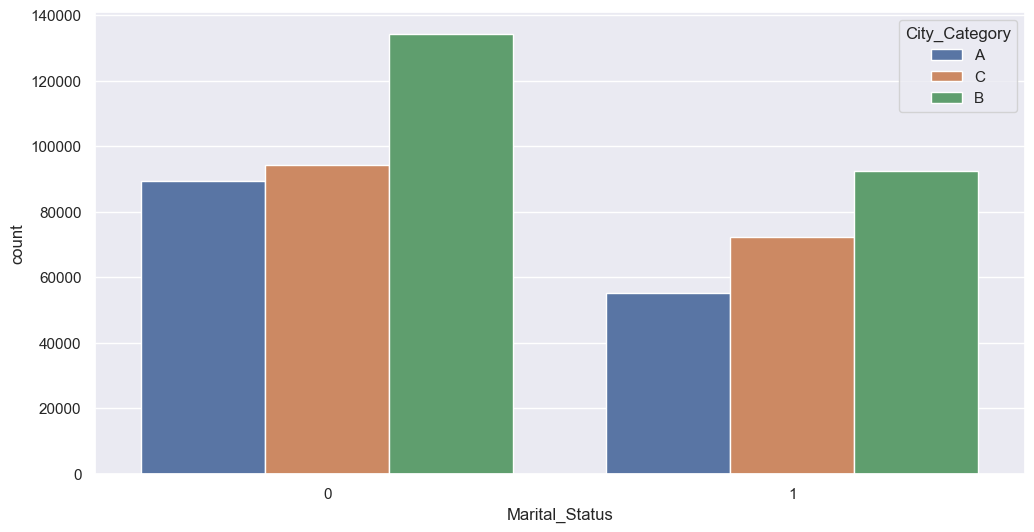

In [87]:
sns.countplot(x='Marital_Status', hue='City_Category', data=df)

<Axes: >

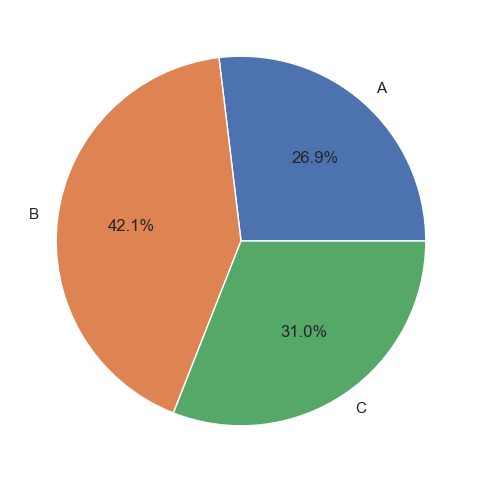

In [89]:
df.groupby('City_Category').size().plot(kind='pie', autopct='%0.1f%%')

<Axes: xlabel='City_Category', ylabel='count'>

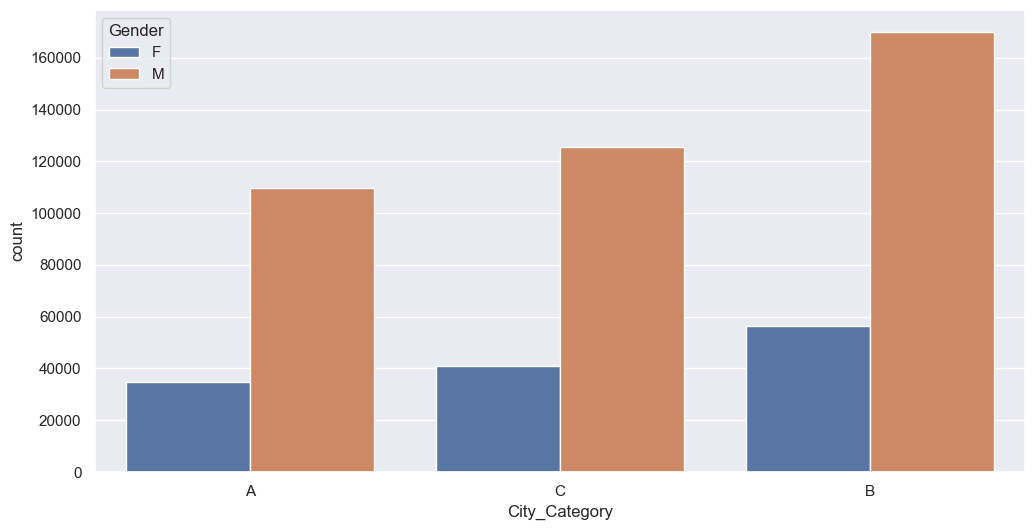

In [91]:
sns.countplot(x='City_Category', hue='Gender', data=df)

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\3742181534.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').sum()['Purchase'].plot(kind='pie', autopct='%0.1f%%')


<Axes: ylabel='Purchase'>

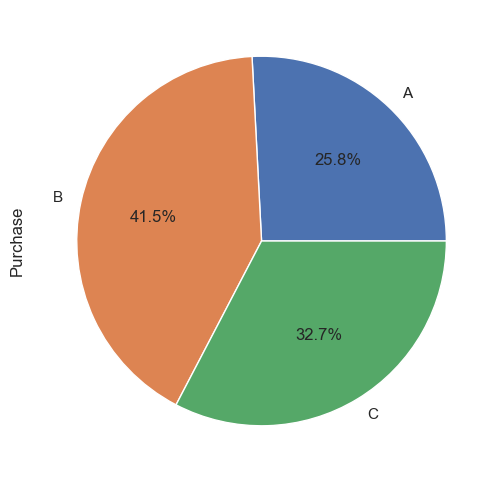

In [82]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie', autopct='%0.1f%%')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\3732629037.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').mean()['Purchase'].plot(kind='pie', autopct='%0.1f%%')


<Axes: ylabel='Purchase'>

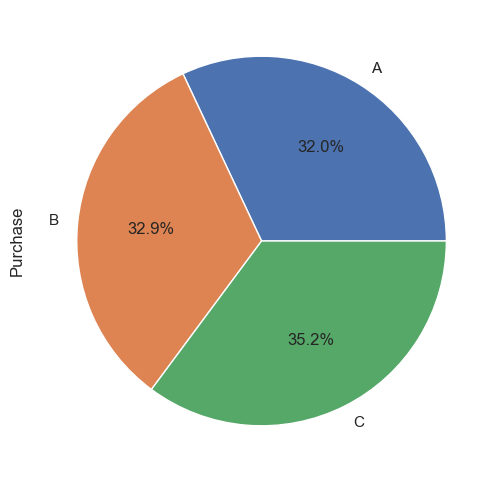

In [83]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie', autopct='%0.1f%%')

# Occupation and Production analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

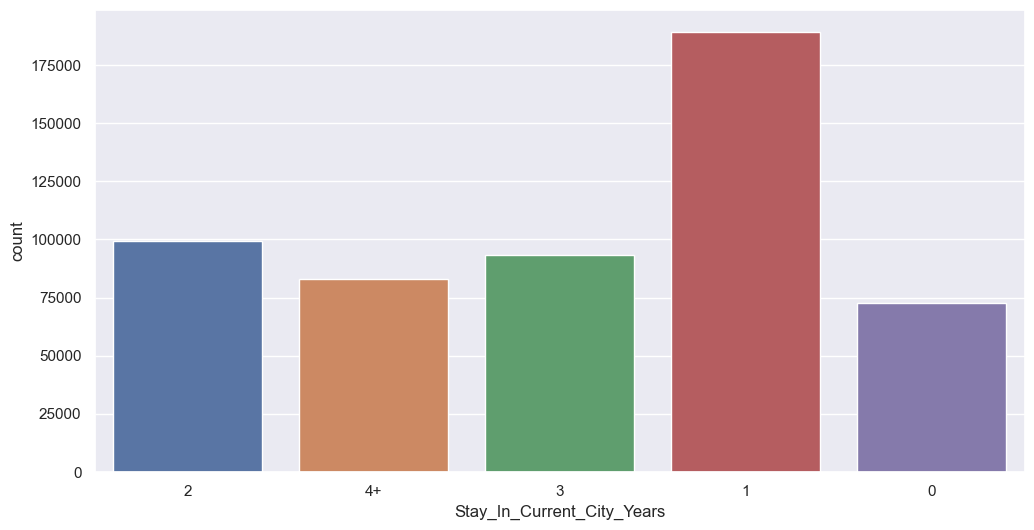

In [95]:
sns.countplot(x='Stay_In_Current_City_Years', data=df)

<Axes: >

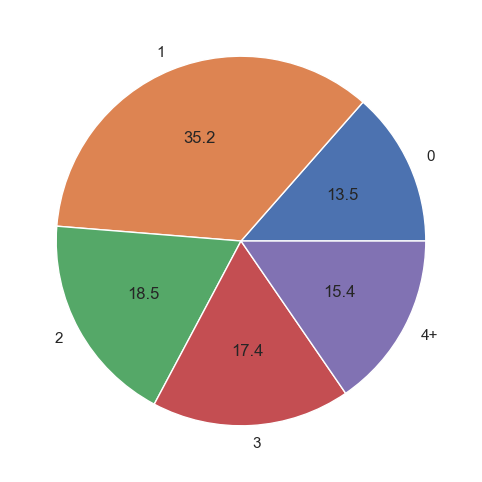

In [102]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie', autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

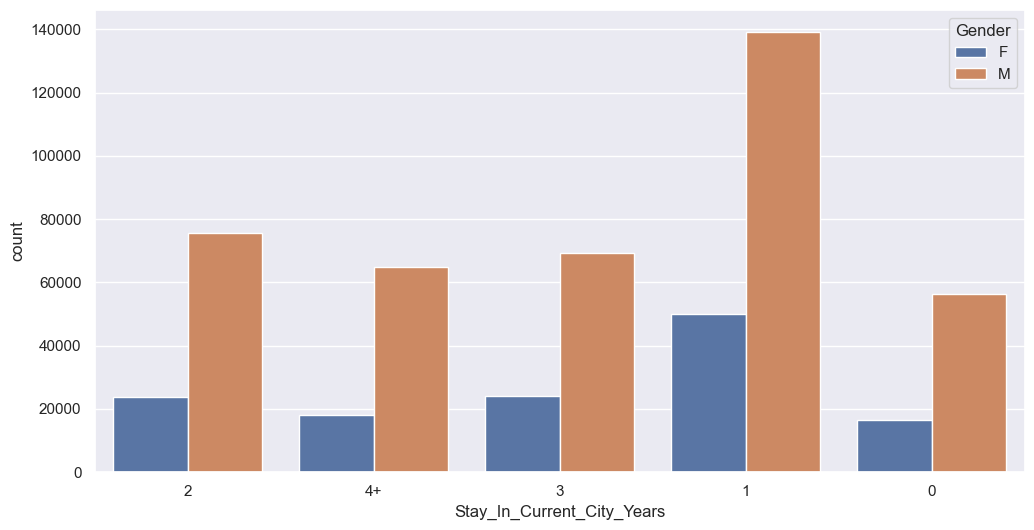

In [96]:
sns.countplot(x='Stay_In_Current_City_Years', hue='Gender', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

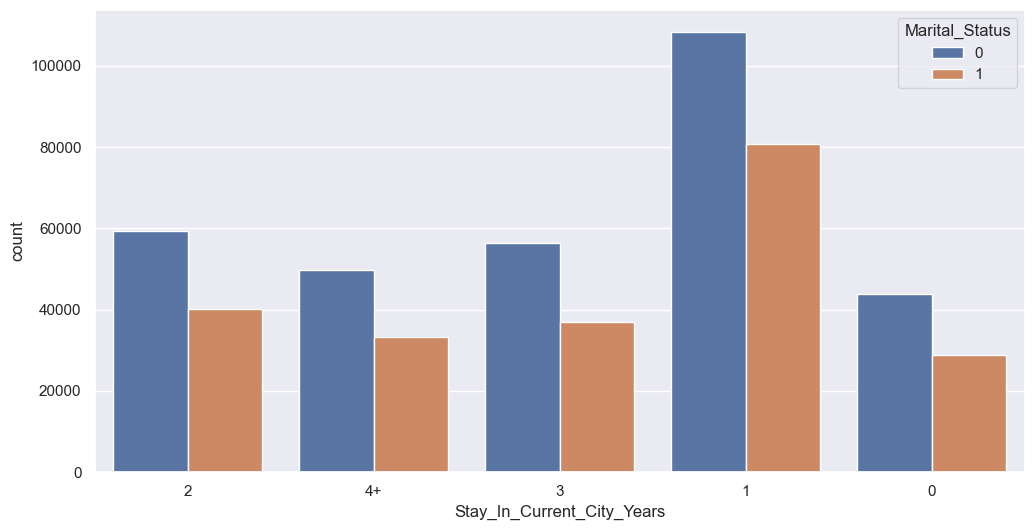

In [98]:
sns.countplot(x='Stay_In_Current_City_Years', hue='Marital_Status', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

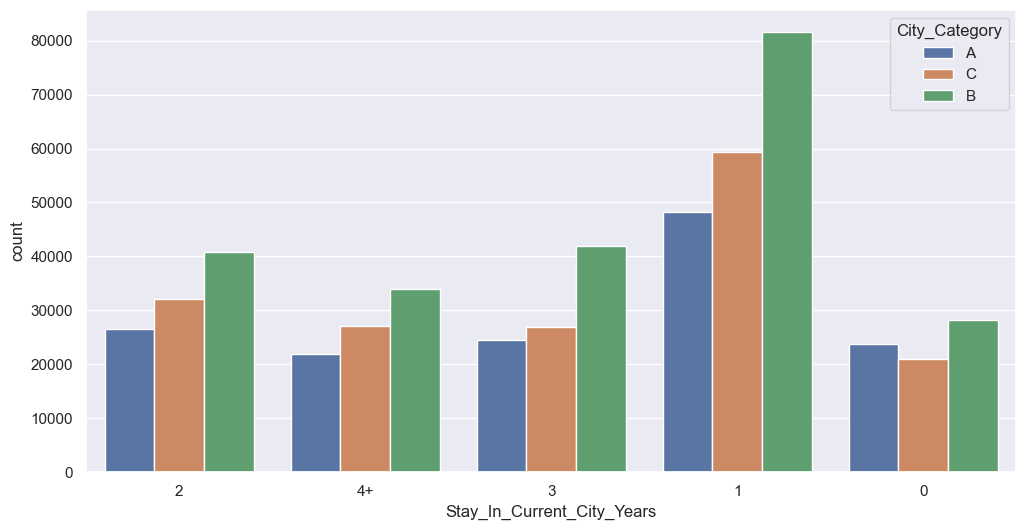

In [101]:
sns.countplot(x='Stay_In_Current_City_Years', hue='City_Category', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

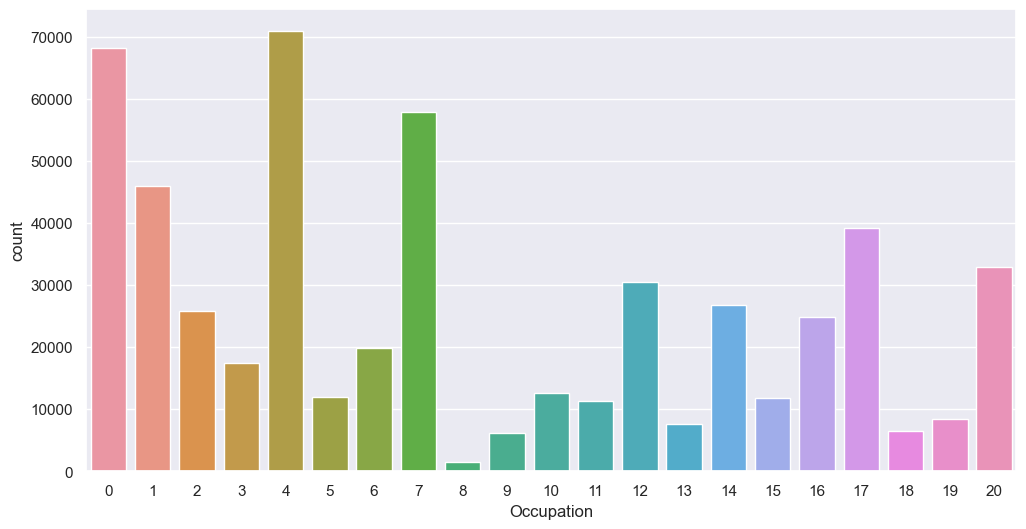

In [103]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

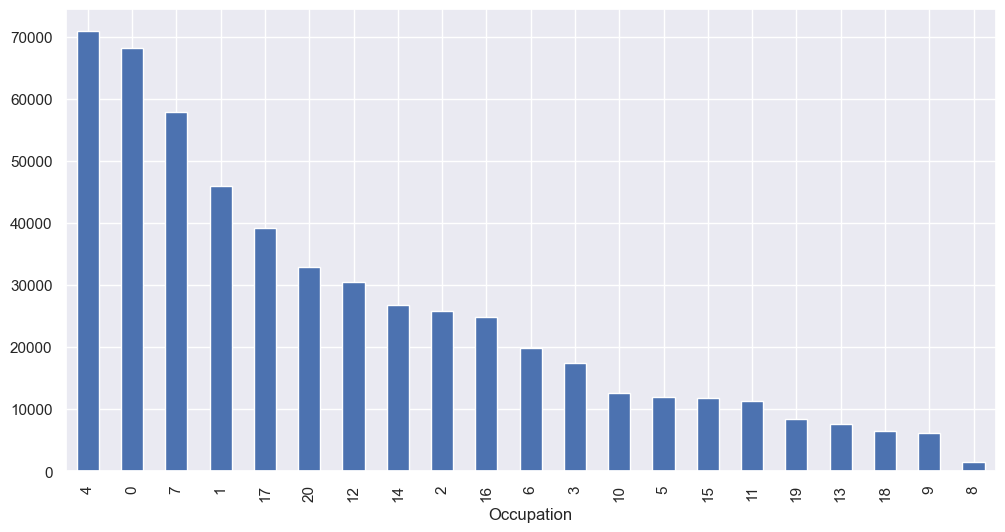

In [105]:
df.groupby('Occupation').size().sort_values(ascending=False).plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\2697343250.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').sum()['Purchase'].sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Occupation'>

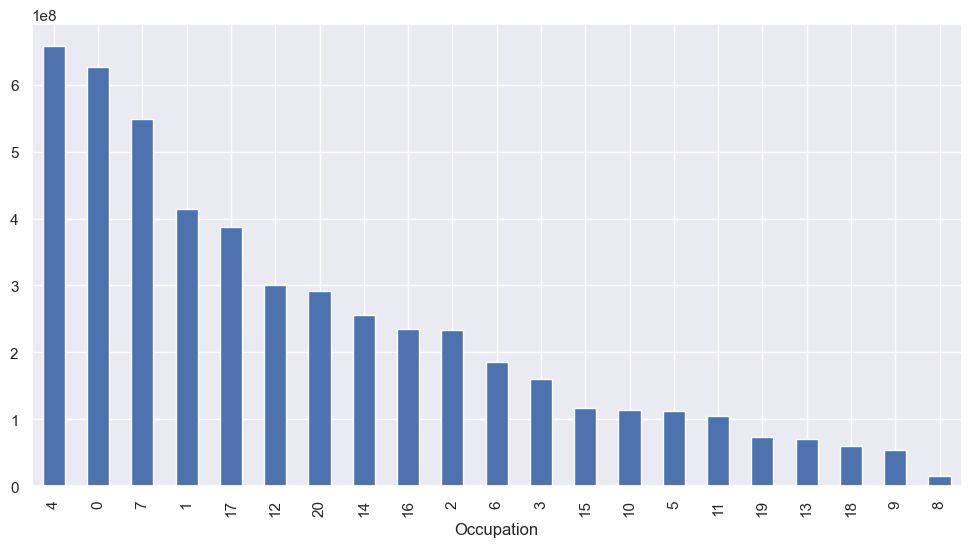

In [106]:
df.groupby('Occupation').sum()['Purchase'].sort_values(ascending=False).plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\2482216452.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Occupation'>

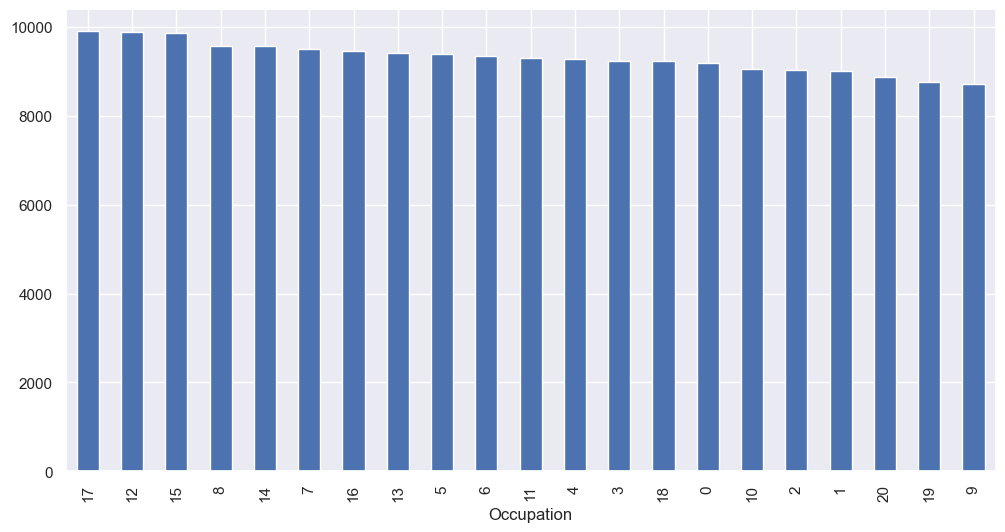

In [107]:
df.groupby('Occupation').mean()['Purchase'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

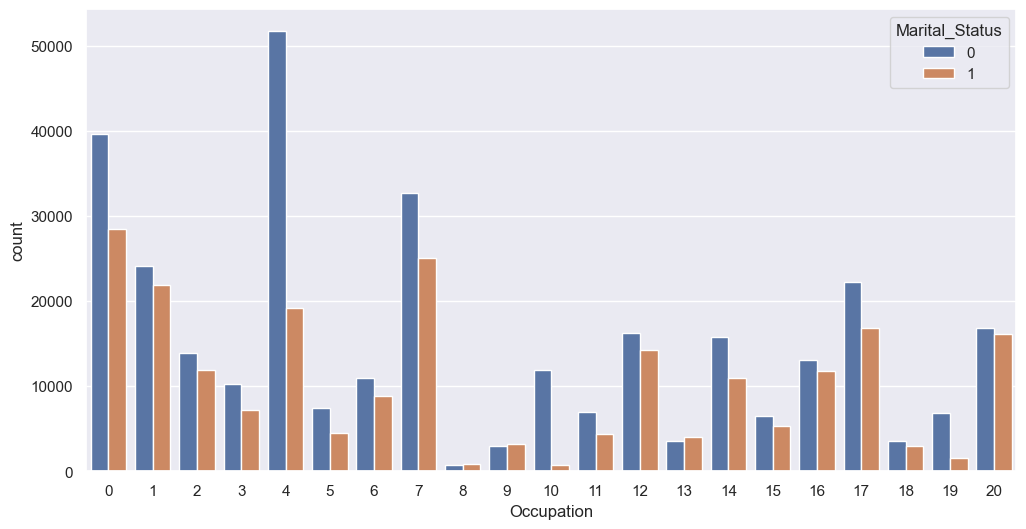

In [108]:
sns.countplot(x='Occupation', hue='Marital_Status', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

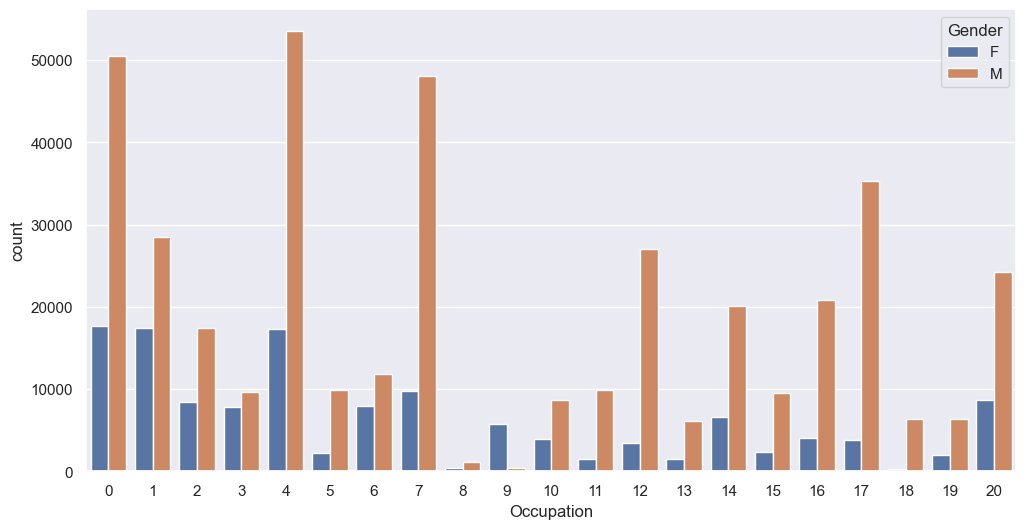

In [109]:
sns.countplot(x='Occupation', hue='Gender', data=df)

<Axes: xlabel='Occupation'>

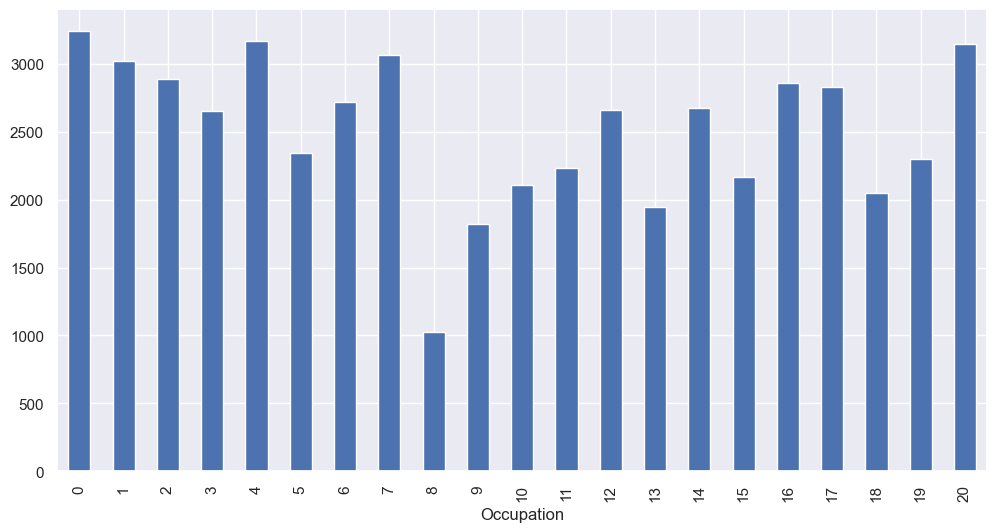

In [110]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')

<Axes: xlabel='Occupation'>

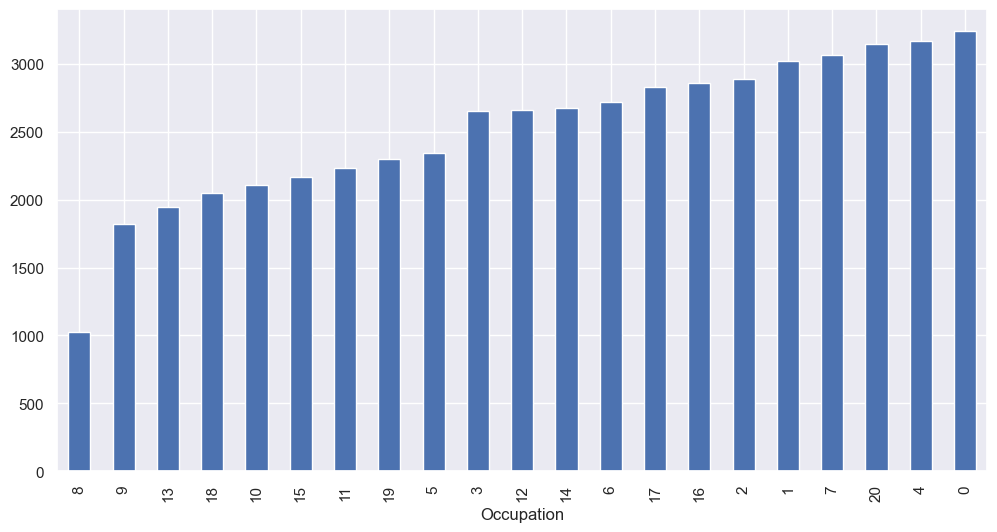

In [112]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\1476192230.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Occupation'>

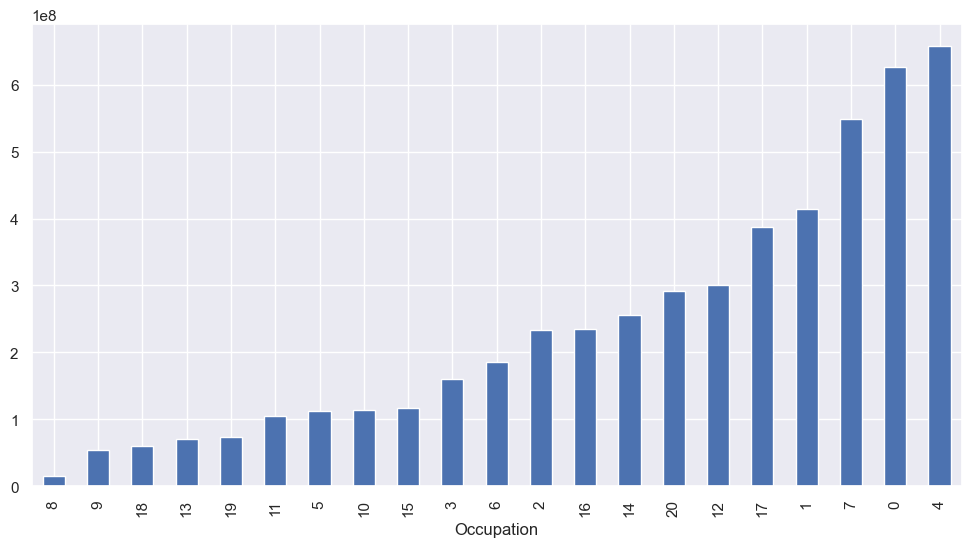

In [113]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\1830348976.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Occupation'>

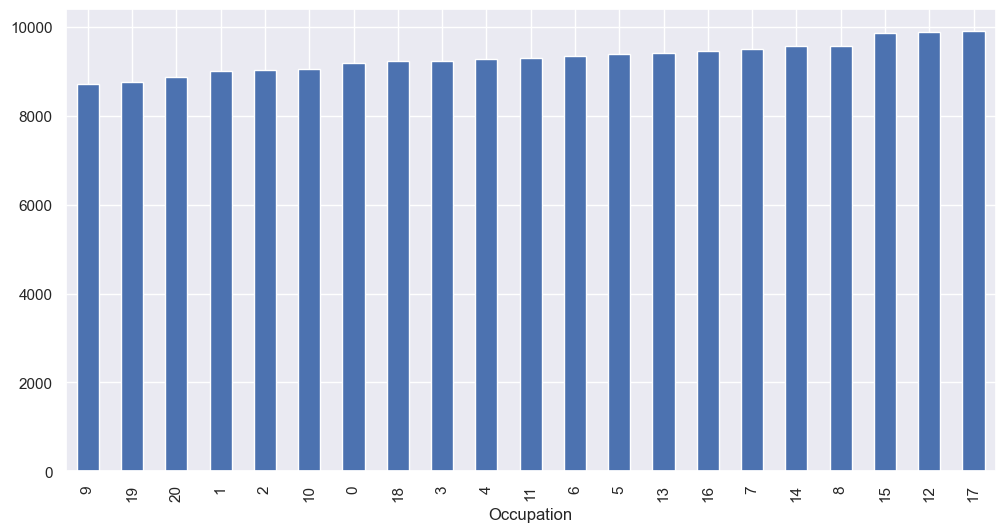

In [114]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

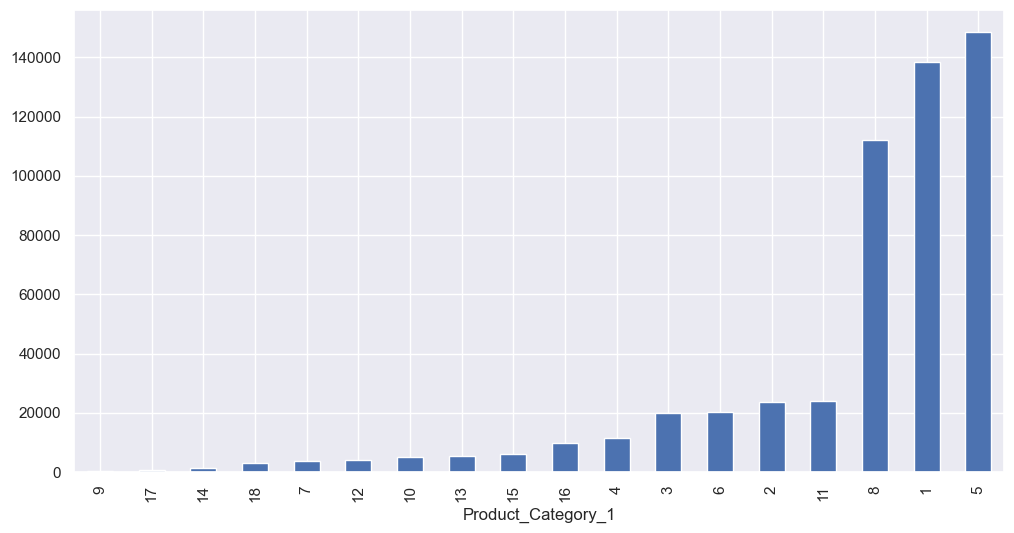

In [117]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\594745959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Product_Category_1'>

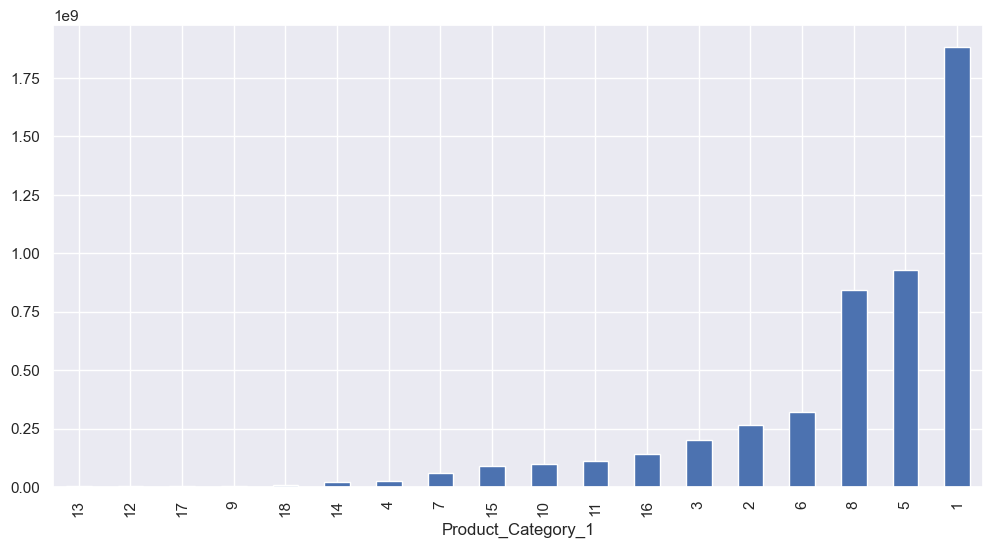

In [118]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\224135489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Product_Category_1'>

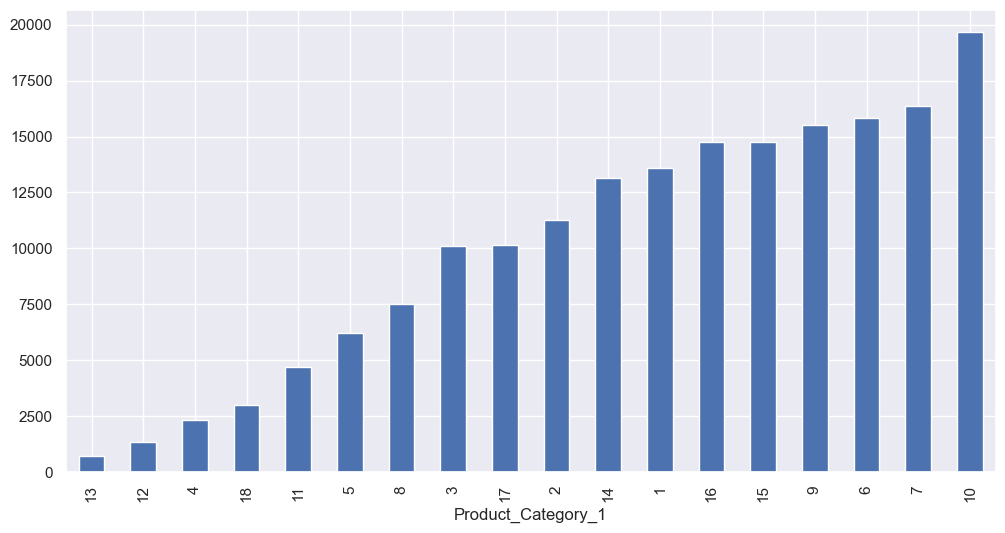

In [119]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\1816218814.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].sort_values().plot(kind='bar')


<Axes: xlabel='Product_ID'>

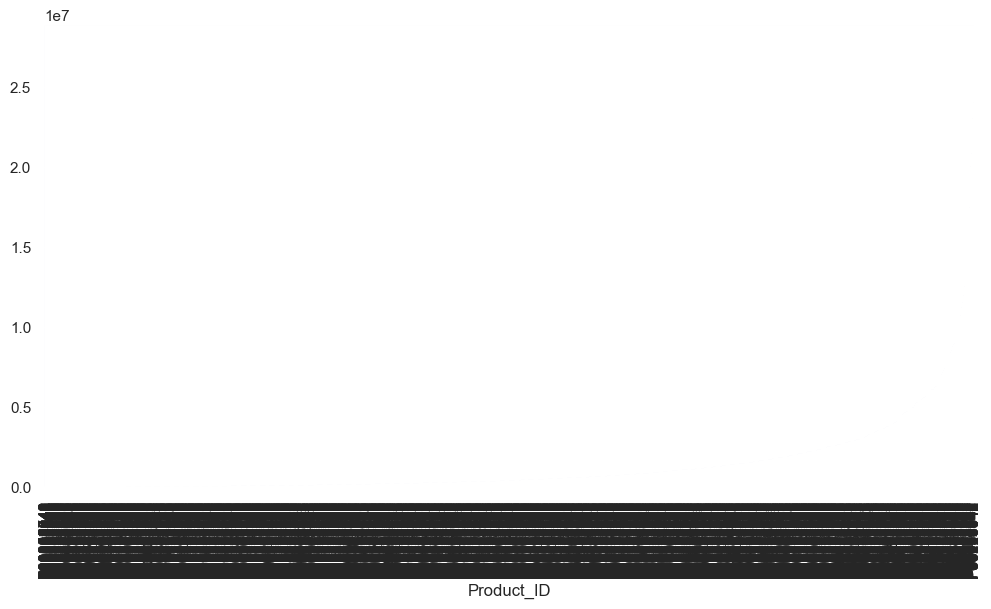

In [120]:
df.groupby('Product_ID').sum()['Purchase'].sort_values().plot(kind='bar')

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_29072\3522037301.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind='bar')


<Axes: xlabel='Product_ID'>

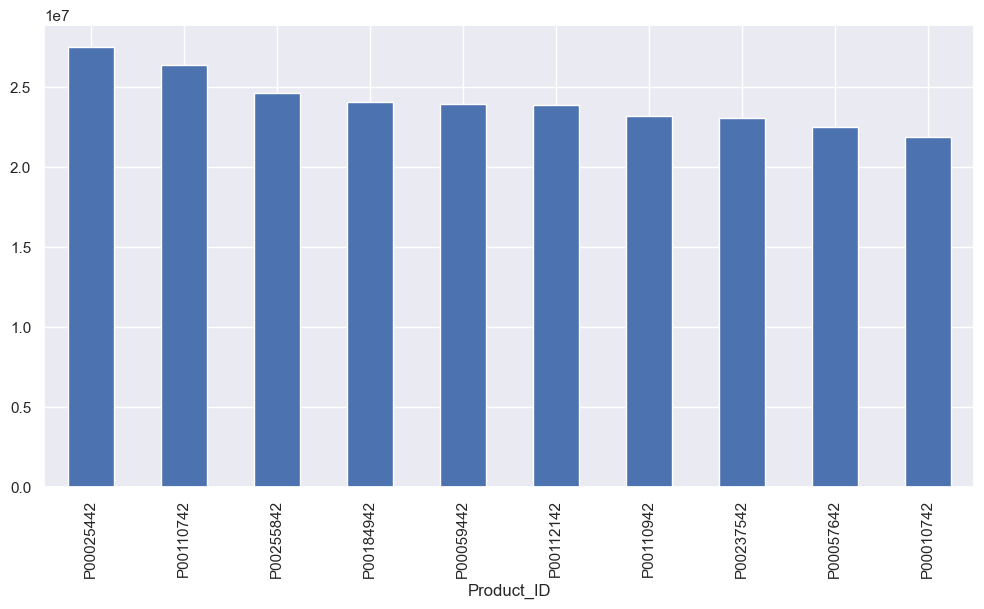

In [122]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

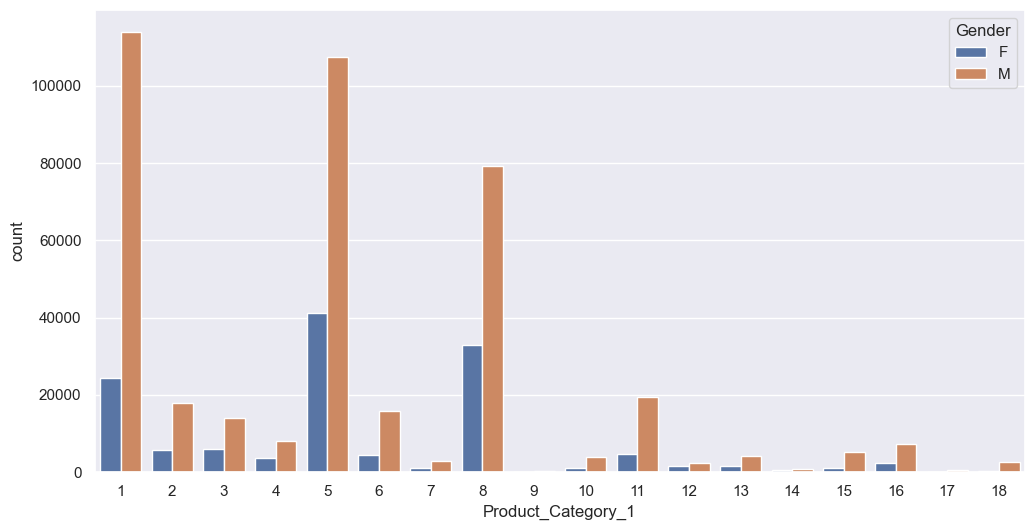

In [123]:
sns.countplot(x='Product_Category_1', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

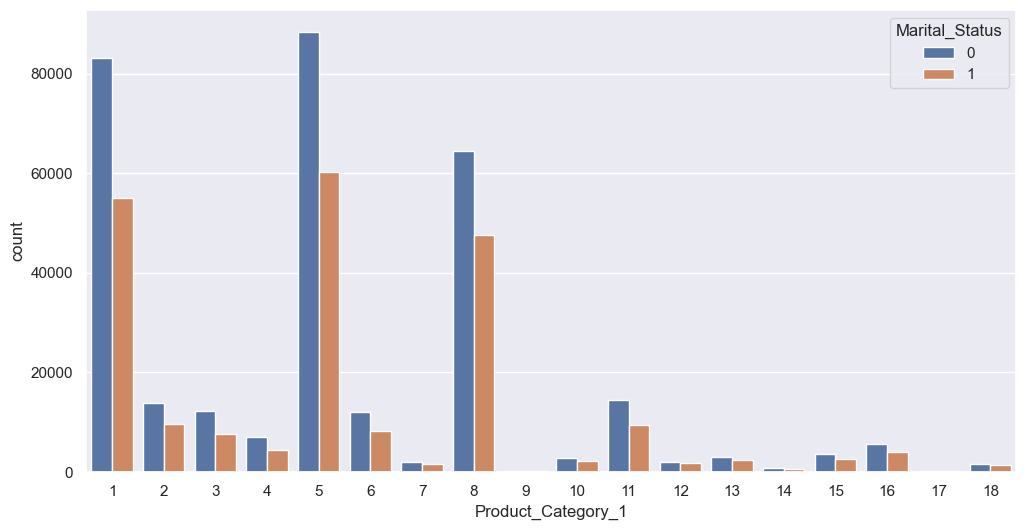

In [124]:
sns.countplot(x='Product_Category_1', hue='Marital_Status', data=df)

# Combining Gender and Marital Status

In [133]:
ls = []
for i in range(len(df)):
    ls.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
df['MaritalGender'] = ls

In [134]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

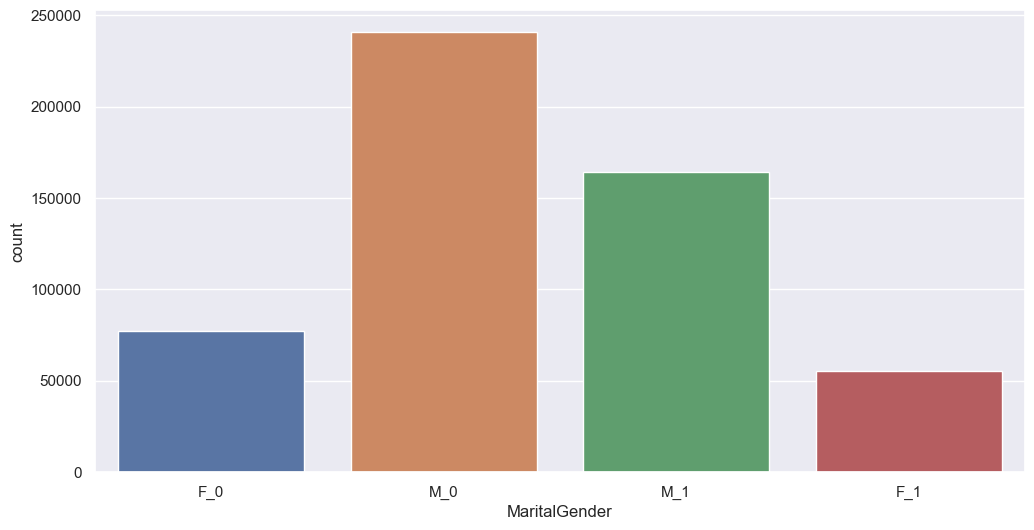

In [135]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

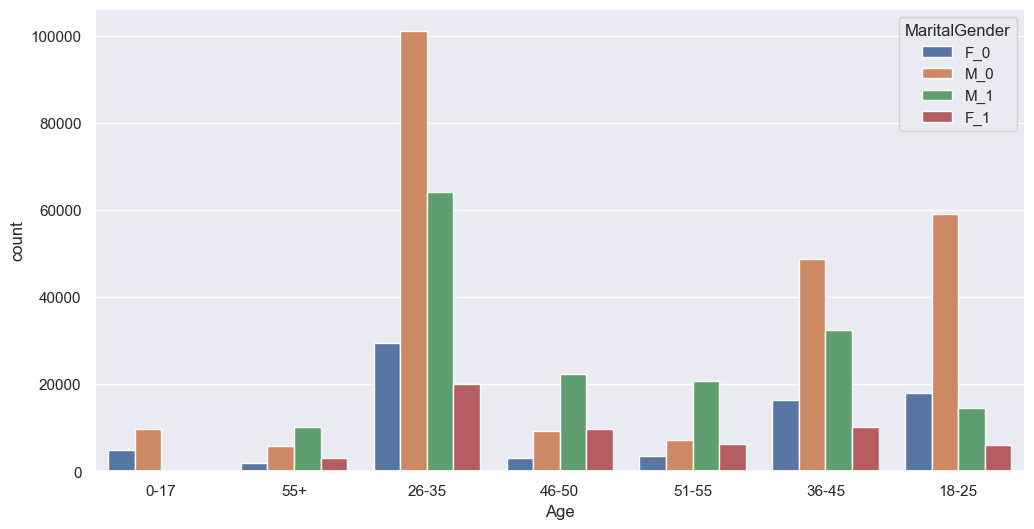

In [138]:
sns.countplot(hue=df['MaritalGender'], x=df['Age'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

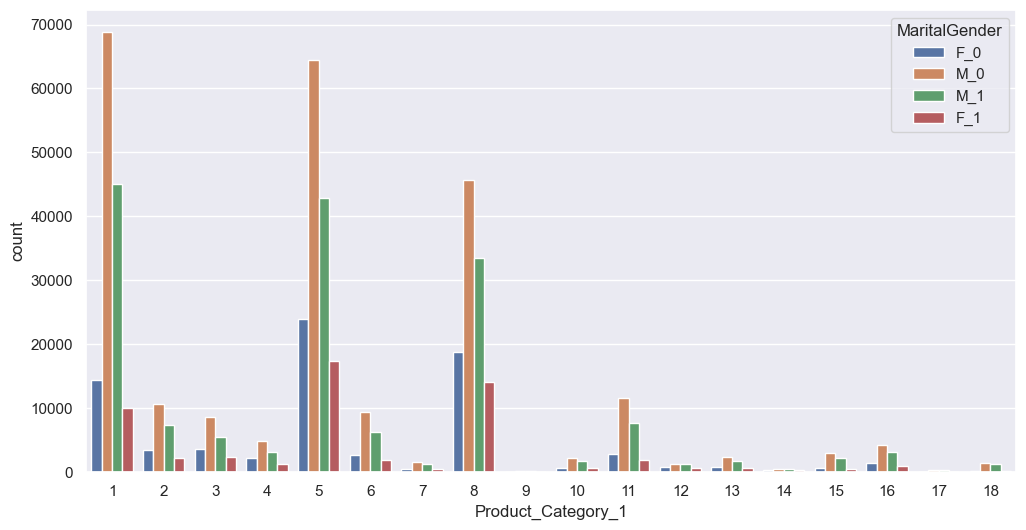

In [139]:
sns.countplot(hue=df['MaritalGender'], x=df['Product_Category_1'])

<Axes: xlabel='MaritalGender', ylabel='count'>

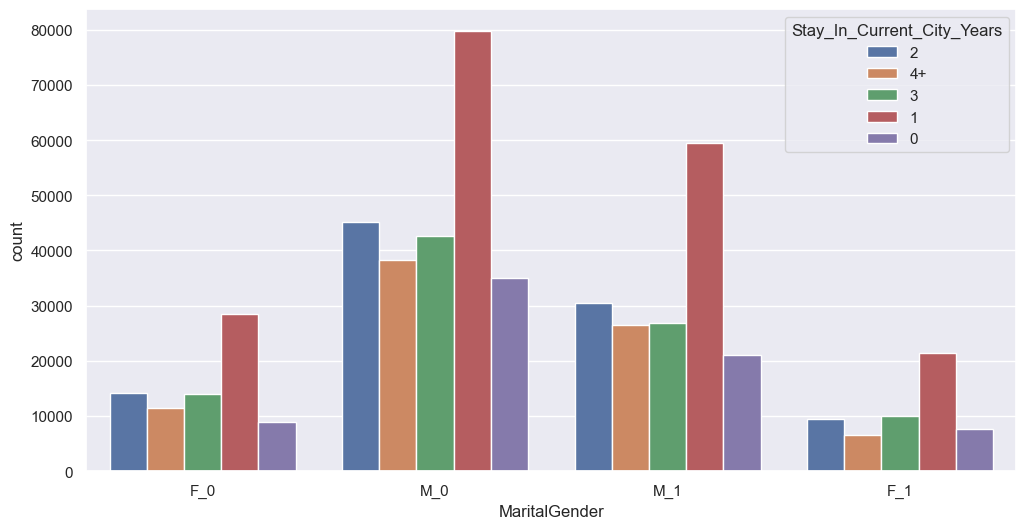

In [140]:
sns.countplot(x='MaritalGender', hue='Stay_In_Current_City_Years', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

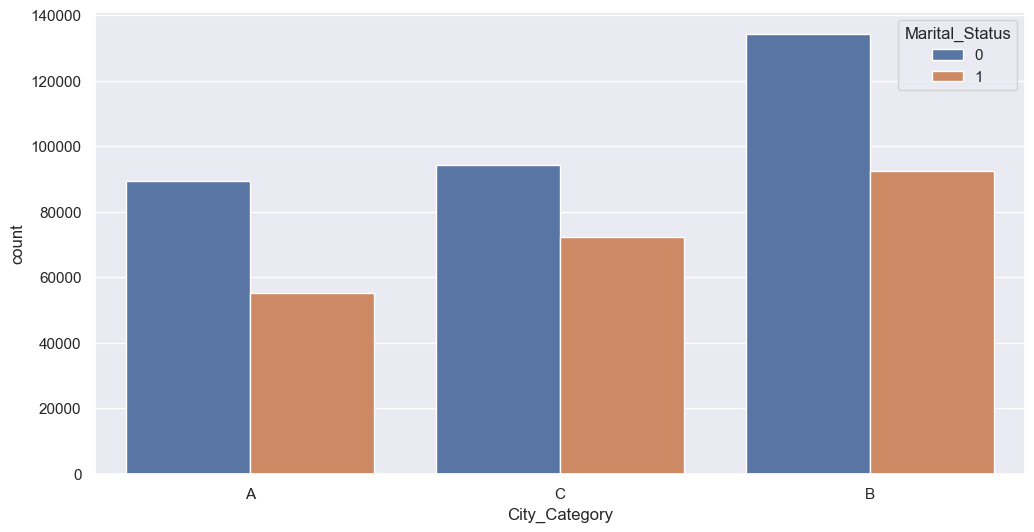

In [142]:
sns.countplot(x='City_Category', hue='Marital_Status', data=df)

In [147]:
df[0,0]

KeyError: (0, 0)